In [403]:
import numpy             as np
import scipy             as sp
import pandas            as pd
import scipy.optimize    as op
import matplotlib.pyplot as plt

import io
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import make_interp_spline

import re
from datetime import datetime

In [347]:
def mnkerr(x, y):
    p = np.polyfit(x, y, 1)
    cov = np.cov(x, y)
    da = 2*(1/(len(x) - 2) * (cov[1][1]/cov[0][0] - p[0]**2))**(0.5)
    db = da * (x**2).mean()
    return [da, db]

In [348]:
space = re.compile(r' ')
converters = {
    'B1'   : lambda x: float(space.split(x)[0].replace(',', '.')),
    'B2'   : lambda x: float(space.split(x)[0].replace(',', '.')),
    'time' : lambda x: datetime.strptime(x, '%Y-%m-%d, %H:%M:%S'),
}

types = {
    'B1' : np.double,
    'B2' : np.double,
}

In [349]:
II2 = pd.read_csv('data/II2.csv', sep = '\t', converters=converters);
II2['time'] = (II2['time'] - II2['time'][0]).dt.total_seconds()

II22 = pd.read_csv('data/II22.csv', sep = '\t', converters=converters);
II22['time'] = (II22['time'] - II22['time'][0]).dt.total_seconds()

III2 = pd.read_csv('data/III2.csv', sep = '\t', converters=converters);
III2['time'] = (III2['time'] - III2['time'][0]).dt.total_seconds()

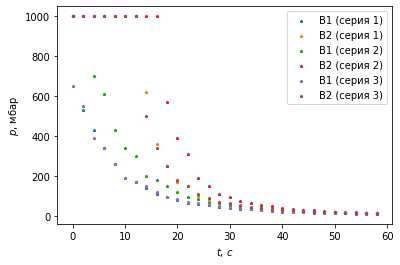

In [438]:
fr = 0
to = 30

def show(x, y, lbl):
    spl = make_interp_spline(x[fr:to], y[fr:to], k = 1)
    t = np.linspace(x[fr:to].min(), x[fr:to].max())
    plt.scatter(x[:to], y[:to], s=7, marker='*', label=lbl)
    #plt.plot(t, spl(t))

fr = 0   
show(II2['time'], II2['B1'], 'B1 (cерия 1)')
show(II2['time'], II2['B2'], 'В2 (cерия 1)')
show(II22['time'], II22['B1'], 'В1 (cерия 2)')
show(II22['time'], II22['B2'], 'В2 (cерия 2)')
show(III2['time'], III2['B1'], 'В1 (cерия 3)')
show(III2['time'], III2['B2'], 'В2 (cерия 3)')

plt.xlabel(r"$t$, $c$")
plt.ylabel(r"$p$, мбар")
    
plt.legend()

plt.savefig('res/p(t).pdf')

[-0.05353918  5.26457489] [0.0027204847158275322, 4.749966313834872]
[-0.05812676  5.72701409] [0.0033815915359184205, 5.9042588217135625]
[-0.05466121  5.35363389] [0.0032038151769947258, 5.593861299032791]


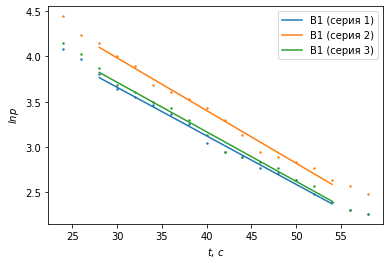

In [447]:
SIZE = 2
fr = 12
to = 30

def lin(x, y, lbl):
    t = np.linspace(x[2:-2].min(), x[2:-2].max())
    plt.scatter(x, y, s=SIZE)
    print(np.polyfit(x[2:-2], y[2:-2], 1), mnkerr(x[2:-2], y[2:-2]))
    plt.plot(t, np.polyval(np.polyfit(x[2:-2], y[2:-2], 1), t), label=lbl)           

lin( II2['time'][fr:to], np.log(II2['B1'][fr:to]), 'B1 (cерия 1)')
lin(II22['time'][fr:to], np.log(II22['B1'][fr:to]), 'B1 (cерия 2)')
lin(III2['time'][fr:to], np.log(III2['B1'][fr:to]), 'B1 (cерия 3)')

plt.xlabel(r"$t$, $c$")
plt.ylabel(r"$lnp$")
    
plt.legend()

plt.savefig('res/lnB1(t).pdf')

[-0.06114334  5.85259018] [0.003734673024573274, 6.520739100904937]
[-0.07164472  6.60850495] [0.004121531209812454, 7.1961934923325455]
[-0.0626099   5.95014673] [0.0029488828644898017, 5.148749481399194]


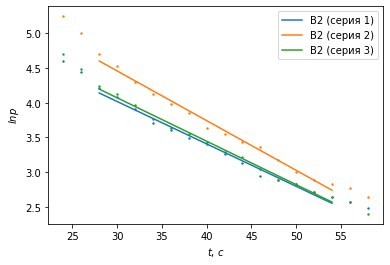

In [448]:
lin( II2['time'][fr:to], np.log(II2['B2'][fr:to]), 'B2 (cерия 1)')
lin(II22['time'][fr:to], np.log(II22['B2'][fr:to]), 'B2 (cерия 2)')
lin(III2['time'][fr:to], np.log(III2['B2'][fr:to]), 'B2 (cерия 3)')

plt.xlabel(r"$t$, $c$")
plt.ylabel(r"$lnp$")
    
plt.legend()

plt.savefig('res/lnB2(t).pdf')

In [449]:
III41 = pd.read_csv('data/III41.txt', sep = '\t', converters=converters);
III41['time'] = (III41['time'] - III41['time'][0]).dt.total_seconds()
III42 = pd.read_csv('data/III42.txt', sep = '\t', converters=converters);
III42['time'] = (III42['time'] - III42['time'][0]).dt.total_seconds()
III43 = pd.read_csv('data/III43.txt', sep = '\t', converters=converters);
III43['time'] = (III43['time'] - III43['time'][0]).dt.total_seconds()

[ -0.01193954 -10.48942218] [0.00159329828211177, 2.075536562164266]
[ -0.0129198  -10.66563953] [0.001352421141501554, 1.7617539403293578]


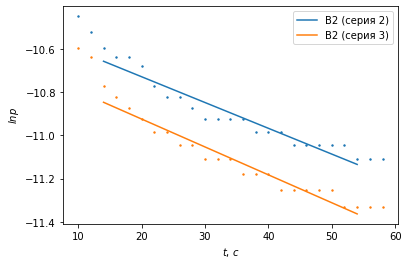

In [465]:
fr = 5
to = 30

def lin(x, y, lbl):
    t = np.linspace(x[2:-2].min(), x[2:-2].max())
    plt.scatter(x, y, s=SIZE)
    print(np.polyfit(x[2:-2], y[2:-2], 1), mnkerr(x[2:-2], y[2:-2]))
    plt.plot(t, np.polyval(np.polyfit(x[2:-2], y[2:-2], 1), t), label=lbl)  

#lin(III41['time'][fr:to], np.log(III41['B2'][fr:to]), 'B2 (cерия 1)')
lin(III42['time'][fr:to], np.log(III42['B2'][fr:to]), 'B2 (cерия 2)')
lin(III43['time'][fr:to], np.log(III43['B2'][fr:to]), 'B2 (cерия 3)')

plt.xlabel(r"$t$, $c$")
plt.ylabel(r"$lnp$")
    
plt.legend()

plt.savefig('res/TMHlnB2(t).pdf')

In [510]:
vsf = 265
vk = vsf * 1e3 / 180 - vsf
v  = vsf * 1e3 / 120
vmag = v - vk

print("v сильфон = {v} мл".format(v = vsf))
print("v полный = {v} мл".format(v = v))
print("v камеры = {v} мл".format(v = vk))
print("v форв магистраль = {v} мл".format(v = vmag))
print("v насоса = {v} мл".format(v = vk))

v сильфон = 265 мл
v полный = 2208.3333333333335 мл
v камеры = 1207.2222222222222 мл
v форв магистраль = 1001.1111111111113 мл
v насоса = 1207.2222222222222 мл


In [509]:
v * 1e-6 * 0.05353918 * 3600

0.39289521323076926

In [506]:
vk * 1e-3 * 0.01193954 * 3600

51.88924084